# Final metric

Group Name: House Hunters               
Group members: Srivats Pulumati, Fernando Seanez, Yanzhen He
# Introduction
We have always been interested in understanding how people choose a neighborhood they want to live in. People often want to choose a neighborhood that suits their needs and goals. For people to achieve their goals and the goals of their family, they often need to stay in a safe neighborhood so they can have enough focus on achieving their personal goals as well as the goals of their family. We wanted to determine how safe a neighborhood is in terms of the key word, crime so we used different metrics to measure the amount of crime in the neighborhoods of Pittsburgh. 

We tried to observe the number of crime incidents that occurred only a specific type of crime, theft that has a very crime value on a scale of 1-100 according to the UCR Hierarchy scale before attempting a different approach to figure out what the safest neighborhood in Pittsburgh is where crime rate was measured in terms of #of arrests, crime incident frequency by the hour in the top 5 crime prone neighborhoods in Pittsburgh as well as counting the number of serious crime offences with high values according to the UCR Hierarchy scale in the top 10 crime prone neighborhoods in Pittsburgh and taking the average of that sum for each neighborhood among the top 10.

# Submetric 1(Fernando Seanez)

# My Metric Explanation:

## Amount of Arrests:

As a group, we each measured different databases with different information, from the amount of firearms seized to even the number of crime incidents. As a group, we all had one established metric: to evaluate the "safeness" of each neighborhood and then determine the safest neighborhood. However, I measured the number of arrests per neighborhood, specifically by using the data set named Pittsburgh Police Arrest Data. By doing so, I used a bar graph to illustrate the data best.  

In [2]:
import pandas as pd
import geopandas 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# First I decided on importing the pandas library and then read the CSV file into a DataFrame named 'arrests'.
arrests = pd.read_csv("Police Arrest.csv")

# Then set the display option to show all rows when printing the DataFrame.

pd.set_option('display.max_rows', None)

# Next group the DataFrame 'arrests' by the column 'INCIDENTNEIGHBORHOOD' and get the count of occurrences in each group.

neighborhood_arrests = arrests.groupby('INCIDENTNEIGHBORHOOD').size()

# Next create a new DataFrame 'd2' with the count of crimes in each neighborhood.

d2 = pd.DataFrame( { "number of crimes comitted" : neighborhood_arrests } )

# Then reset the index of DataFrame 'd2'.

d2.reset_index(inplace=True)

# Next you rename the columns of DataFrame 'd2' to more meaningful names.

d2.columns = [ "Neighborhoods", "Number_of_Arrests_Made"]

# Then sort the DataFrame 'd2' based on the 'Number_of_Arrests_Made' column in ascending order.

d2 = d2.sort_values(by = 'Number_of_Arrests_Made')

# Finally I decided on printing the sorted DataFrame 'd2'.

print(d2)


                  Neighborhoods  Number_of_Arrests_Made
57      Mt. Oliver Neighborhood                       2
91       Troy Hill-Herrs Island                       6
56              Mt. Oliver Boro                      18
19            Central Northside                      23
72                Regent Square                      36
73                    Ridgemont                      37
58                New Homestead                      39
88               Swisshelm Park                      42
21               Chartiers City                      46
27                East Carnegie                      48
84                    St. Clair                      54
64               Outside County                      56
65                Outside State                      64
87                  Summer Hill                      74
62                      Oakwood                      80
37  Golden Triangle/Civic Arena                      83
39                         Hays                 

# Dataset Explanation
As you can see, this is raw data, which was pulled, counted, and then sorted to count the number of arrests made per neighborhood. I then sorted the output of this dataset from the least to the greatest amount of arrests. If you have yet to notice, this is quite hard to read, which we wouldn't want for the intended audience. That being said, it gives us a good reason to convert this sorted dataset into a bar graph.


# Result Evaluation

By examining our ugly yet functionally sorted database, we can conclude that the neighborhood of Mount Oliver has the least number of arrests in the period of seven years, which allows us to determine that, on paper, it is the safest neighborhood. On the contrary, we can then determine that the neighborhood of Central Business District (also known as downtown) allows us to determine that it is the least safest neighborhood due to its 4250 arrests. This would be highly useful for our intended audience.

# Code Explanation: Comments Found Above Each Code Segment 


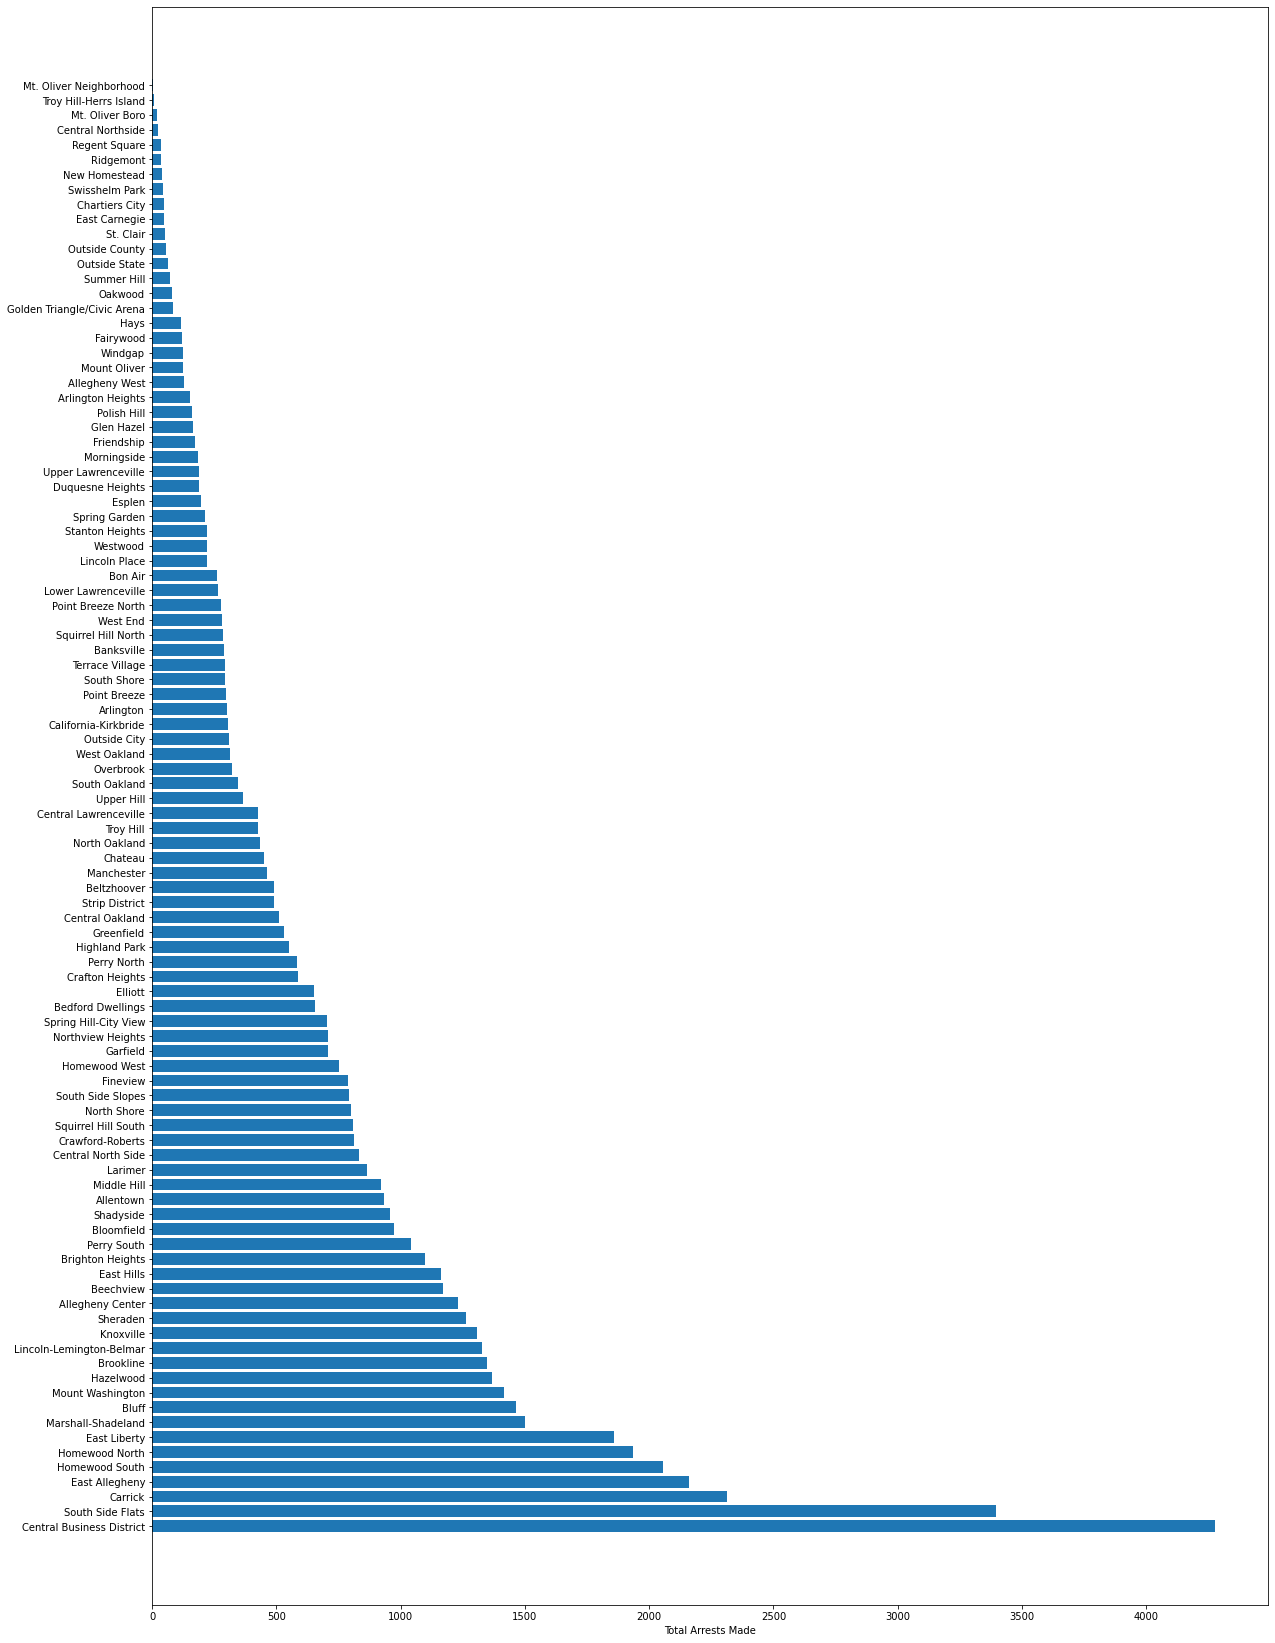

In [7]:
# First convert the 'Number_of_Arrests_Made' column in DataFrame 'd2' to numeric values

d2['Number_of_Arrests_Made'] = pd.to_numeric(d2['Number_of_Arrests_Made'], errors='coerce')

# Then sort DataFrame 'd2' based on the 'Number_of_Arrests_Made' column in descending order

d2_sorted = d2.sort_values(by= 'Number_of_Arrests_Made', ascending=False)

# Next set the figure size for the horizontal bar plot based on the number of neighborhoods in the sorted DataFrame

# Next create a horizontal bar plot using the sorted DataFrame 'd2_sorted'

plt.figure(figsize=(20, d2_sorted.shape[0] * 0.3))
plt.barh(d2_sorted['Neighborhoods'], d2_sorted['Number_of_Arrests_Made'])
plt.xlabel("Total Arrests Made")

# Now finally output the bar graph 
plt.show()



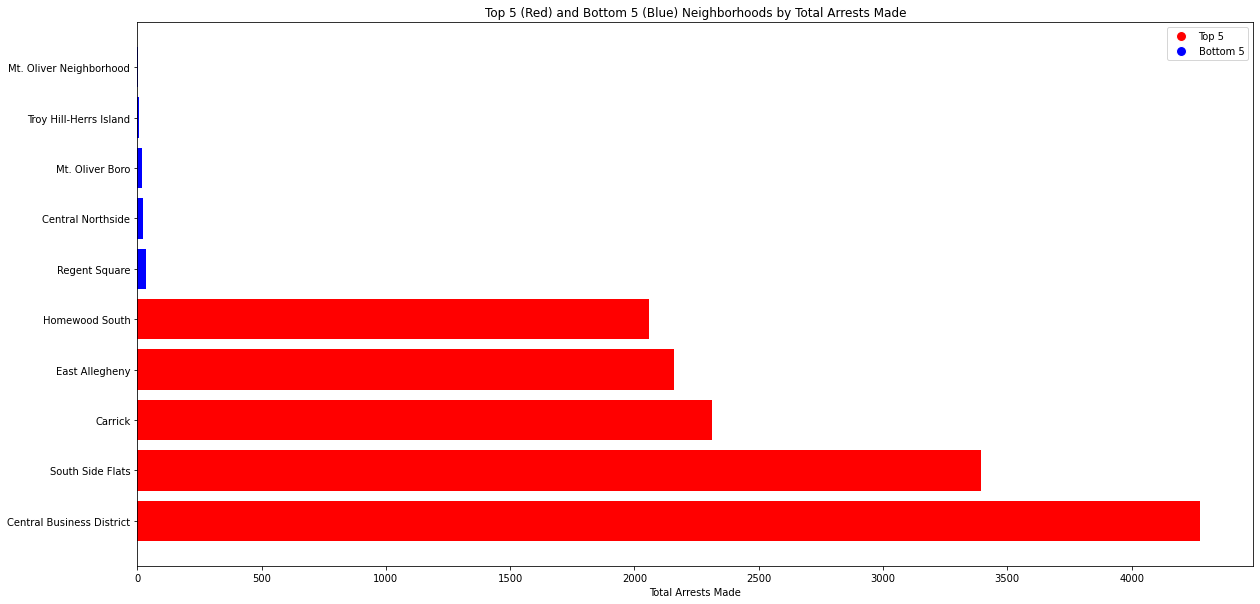

In [8]:
d2['Number_of_Arrests_Made'] = pd.to_numeric(d2['Number_of_Arrests_Made'], errors='coerce')

# First sort the DataFrame by 'Number_of_Arrests_Made' in descending order
d2_sorted = d2.sort_values(by='Number_of_Arrests_Made', ascending=False)

# Now select the top 5 and bottom 5 neighborhoods
top_and_bottom_5 = pd.concat([d2_sorted.head(5), d2_sorted.tail(5)])

# Then create a bar graph with different colors for top and bottom 5
colors = ['red'] * 5 + ['blue'] * 5
plt.figure(figsize=(20, 10))
plt.barh(top_and_bottom_5['Neighborhoods'], top_and_bottom_5['Number_of_Arrests_Made'], color=colors)
plt.xlabel("Total Arrests Made")
plt.title("Top 5 (Red) and Bottom 5 (Blue) Neighborhoods by Total Arrests Made")

# Next add a legend (in terms of grphing)
top_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Top 5')
bottom_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Bottom 5')
plt.legend(handles=[top_legend, bottom_legend])

# Finally output the graph 
plt.show()


# Dataset Explanation
If you hadn't noticed, the previous bar graph outputted the raw sorted data from all neighborhoods. Although the graph has the x-axis as the total arrests made and the Y-axis as the neighborhoods, the output still resembles the same conclusion that Mount. Oliver and Downtown were both the safest and not the safest neighborhoods in the city most of us call home. Although it outputted what we were looking for, for the data set in the form of a bar graph to be easy to read, I decided on sorting and only outputting the five safest and least safe neighborhoods on my graph.

# Result Evaluation

By analyzing our updated graph, we can now examine much more quickly that the five safest neighborhoods on paper are Mt.Oliver, Troy Hill-Herrs Island, Mt.Oliver Boro, Central Northside, and Regent Square in the period of seven years. On the contrary, the neighborhoods of Central Business District, South Side Flats, Cerrick, East Allegheny, and Homewood South are labeled the least safest. By splitting the chart into two different and less amount of neighborhoods, it is more attractive to the human eye. This new and updated graph can now have the power to help our provided audience. 

## Submetric 2(Yanzhen He)
The dataset I chose are the Police incident Blotter (30days) and the Pittsburgh Police Firearm Seizures dataset. 

I have a graph showing the top five neighborhoods incidents frequencies and how they change by time
and a gragh showing the frequecy of firearm seizeures by neighborhood. 

<Figure size 864x576 with 0 Axes>

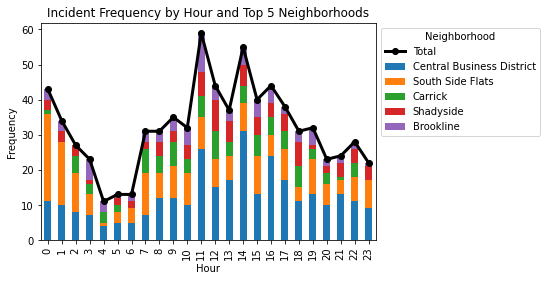

In [3]:
file_path = 'Blotter Data.csv'  
df = pd.read_csv(file_path)

neighborhood_counts = df['INCIDENTNEIGHBORHOOD'].value_counts()

df['Hour'] = df['INCIDENTTIME'].apply(lambda x: int(x.split('T')[1].split(':')[0]))
grouped_data = df.groupby(['Hour', 'INCIDENTNEIGHBORHOOD']).size().unstack(fill_value=0)

# Calculate the total frequency for each neighborhood
total_by_neighborhood = grouped_data.sum(axis=0)

# Select the top five neighborhoods based on total frequency
top_neighborhoods = total_by_neighborhood.sort_values(ascending=False).head(5).index

# Filter the grouped_data for the top five neighborhoods
grouped_data_top5 = grouped_data[top_neighborhoods]

# Create a new DataFrame with the total frequency for each hour
total_by_hour = grouped_data_top5.sum(axis=1)

# Plot the frequency versus time for the top five neighborhoods
plt.figure(figsize=(12, 8))
grouped_data_top5.plot(kind='bar', stacked=True)
plt.plot(total_by_hour, color='black', linewidth=3, marker='o', label='Total')
plt.title('Incident Frequency by Hour and Top 5 Neighborhoods')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend(title='Neighborhood', bbox_to_anchor=(1, 1))
plt.show()

Graph showing Top 5 neighborhoods change by time in a day

1. Central Business District (Blue) and South Side Flats (Orange) have taken the majority in this graph. 
2. South Side Flat at 0-3am had the highest frequecy of incident, even higher than than the CBD.
3. Indcident frequency usually increase in the afternoon 

This graph showing the average HIERARCHY of the incident at different time

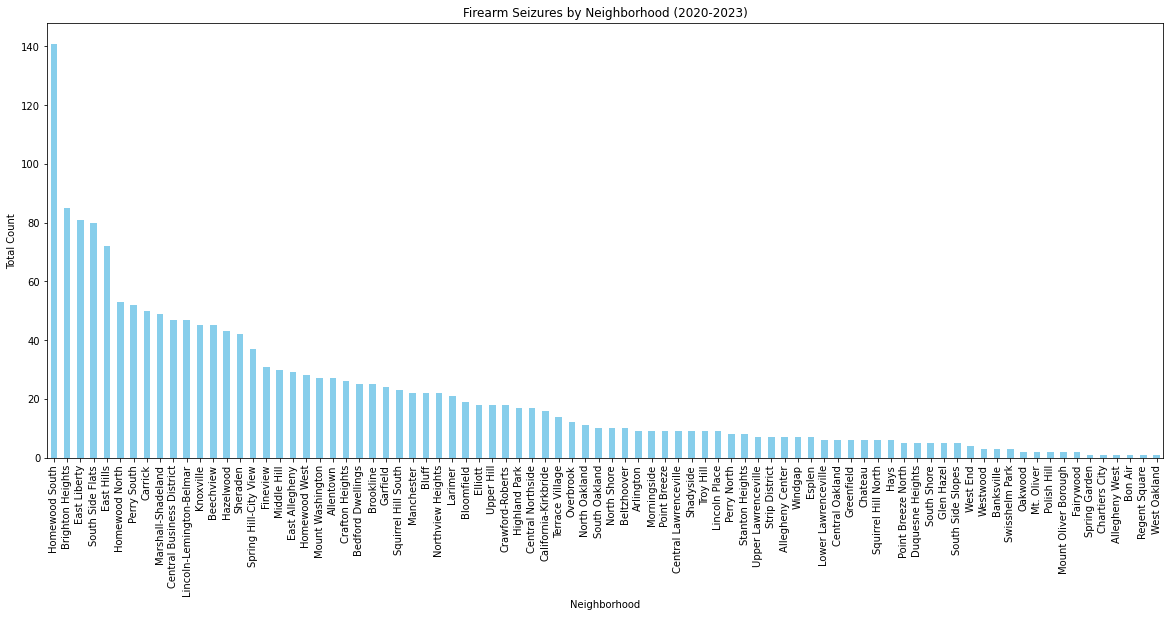

                  Total Count
neighborhood                 
Homewood South            141
Brighton Heights           85
East Liberty               81
South Side Flats           80
East Hills                 72
...                       ...
Chartiers City              1
Allegheny West              1
Bon Air                     1
Regent Square               1
West Oakland                1

[84 rows x 1 columns]


In [4]:
# Read the CSV file
df = pd.read_csv("Firearm Seizures Data.csv")

filtered_data = df[df['year'].between(2020, 2023)]

# Calculate the total count for each neighborhood
neighborhood_counts = filtered_data.groupby('neighborhood')['total_count'].sum()

# Sort the data in descending order
neighborhood_counts = neighborhood_counts.sort_values(ascending=False)

# Create a statistical plot for the "neighborhood" data using the "total_count" column
plt.figure(figsize=(20, 8))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Firearm Seizures by Neighborhood (2020-2023)')
plt.xlabel('Neighborhood')
plt.ylabel('Total Count')
plt.show()

# Create a table
table = pd.DataFrame(neighborhood_counts)
table.columns = ['Total Count']
print(table)


### Conclusion
The central business district and south side flat seems having serious problem in safety. My favorite neighborhood is Shadyside. It is doing fine in this analysis. I calculated the incidents and firearm seizures by neighborhoods and Shadyside are in the middle of the rank

## Submetric 3(Srivats Pulumati)

I wanted to choose the top 10 neighborhoods with the greatest number of crime incidents for my data analysis. To filter my dataset for only crimes that occurred in November, I had to convert my "INCIDENTTIME column" to a date time object from its string format of YYYY-MM-DD in the INCIDENTTIME column and then could choose crime incidents that occurred in November in the neighborhoods of Pittsburgh. The .to_datetime function allowed me to convert an incident's date from string format, YYYY-MM-DD to a date time object as I need to use .dt.month function later in my code to filter neighborhoods and incidents only in November.
I figured out another way to measure how safe a neighborhood in November was by seeing how many serious offenses occurred in that neighborhood in November. Using the .groupby function, I was able to group all the neighborhoods in the dataset by their Hierarchy values and used the .mean().sort_values(ascending = False) operator to calculate the total hierarchy score for all the offenses that took place in a respective neighborhood divided by the number of crime incidents that had a hierarchy value in November to get its average hierarchy value.
Using the .xticks(rotation = angle) and .tight_layout functions, I was able to prevent the names of neighborhoods from overcrowding one another and make it look neater and fancier. The .tight_layout() function prevents names from overlapping each other and gives them an equal amount of separation space based on the size of your graph.


In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# Jupyter Hub reads the dataset from the WRPDC Website that is downloaded as a .csv file
dataset = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")

#Calculates how many crime incidents have occured from 2016 to 2023 in all the neighborhoods of pittsburgh from the incident neighborhood column
crimeincidents_count = dataset['INCIDENTNEIGHBORHOOD'].value_counts()

#Prints out the values for the number of crime incidents for different neighborhoods in pittsburgh in descending order
print(crimeincidents_count)

Central Business District    19468
South Side Flats             18744
Carrick                      11731
Shadyside                     8602
Bloomfield                    8566
                             ...  
Ridgemont                      293
Troy Hill-Herrs Island         252
Outside County                 248
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 99
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


In [3]:
# Choosing the top 10 neighborhoods with the largest amount of crime incidents from the bar graph displayed above
Pittsburgh_neighborhoods = ['Central Business District', 'South Side Flats', 'Carrick', 'Shadyside', 'Bloomfield', 'East Liberty', 'Squirrel Hill South', 'Brookline', 'Mount Washington', 'Homewood South']
# Converting our INCIDENTTIME column to a datetime object from the string format YYYY-MM-DD
dataset['INCIDENTTIME'] = pd.to_datetime(dataset['INCIDENTTIME']) 
# Filtering the data in our data set to only include data from the month of November for when crime incidents occur in the neighborhoods of pittsburgh
neighborhood_filtered_data = dataset[(dataset['INCIDENTNEIGHBORHOOD'].isin(Pittsburgh_neighborhoods)) & (dataset['INCIDENTTIME'].dt.month == 11)]
# Using the UCR Hierarchy in my data set, we measure the number of the most severe crimes that have occured in these top 10 crime prone neighborhoods of Pittsburgh
average_amount_of_crime_rates = neighborhood_filtered_data.groupby('INCIDENTNEIGHBORHOOD')['HIERARCHY'].mean().sort_values(ascending=False)

 The .plot function in the code block below creates a plot for our data which consists of neighborhood names and the number of crime incidents associated with that respective neighborhood plotted in the form of a bar graph, where we specify the type of graph we want to plot using kind = 'bar'.

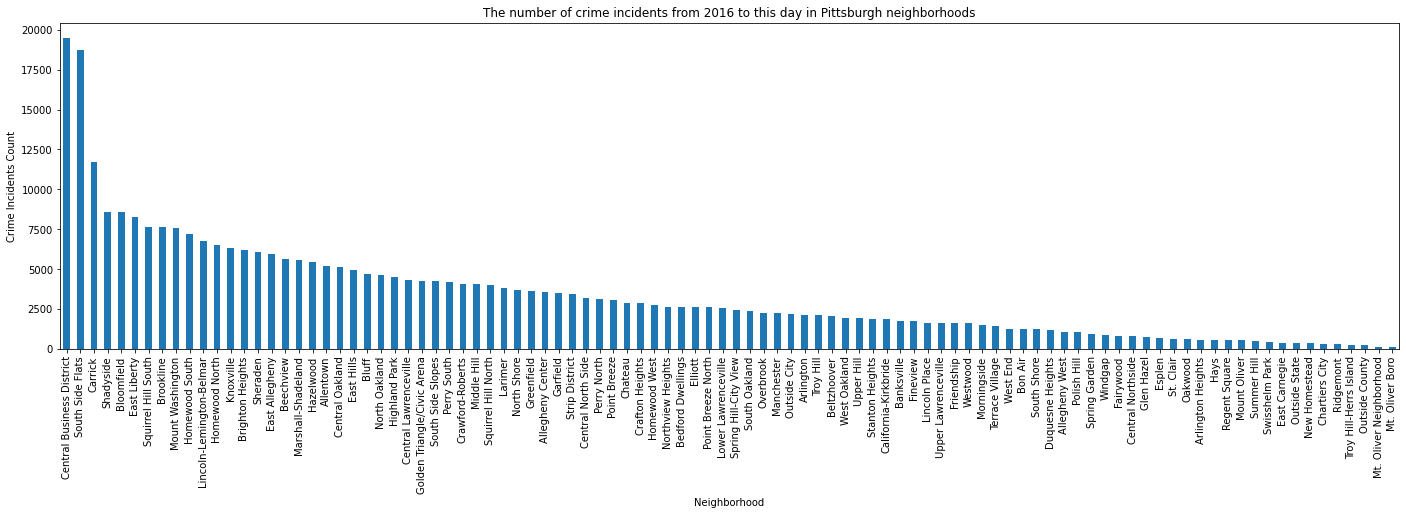

In [4]:
# Generates a 24 inches x 6 inches graph that shows the # of crime incidents for all the neighborhoods of Pittsburgh
plt.figure(figsize = (24, 6))
# Creates a bar graph that displays the number of crime incidents that have occured for each neighborhood in Pittsburgh
crimeincidents_count.plot(kind='bar')
# The title of the Bar graph
plt.title('The number of crime incidents from 2016 to this day in Pittsburgh neighborhoods')
# Every Neighborhood name shown on the x axis
plt.xlabel('Neighborhood')
# The number of crime incidents that have occured so far from 2016 till now for each neighborhood in Pittsburgh
plt.ylabel('Crime Incidents Count')
# Displays the plot
plt.show()

# Data Set Explanation:
This is a bar graph that shows a list of all the neighborhoods in Pittsburgh and the number of crime incidents that took place in each of these neighborhoods from 2016 up till this date. The data is derived from the "INCIDENT NEIGHBORHOOD" column of our dataset and displayed as a bar graph.

# Result Explanation:
With a direct visual showing the total amount of crime incidents in all the neighborhoods of Pittsburgh, we can deduce what is the safest and least safe neighborhood to live in or accomplish one's goals in. 
Individuals who want to live in a safe neighborhood would most likley prefer the top 5 least crime prone areas at the end of the bar graph whereas individuals who don't want to live in a neighborhood but rather set up a business in that neighborhood for example would probably choose a neighborhood with a moderate amount of crime incidents as there are neighborhoods where more consumers stay in but with some or several number of crime incidents also present in that neighborhood as they need customers

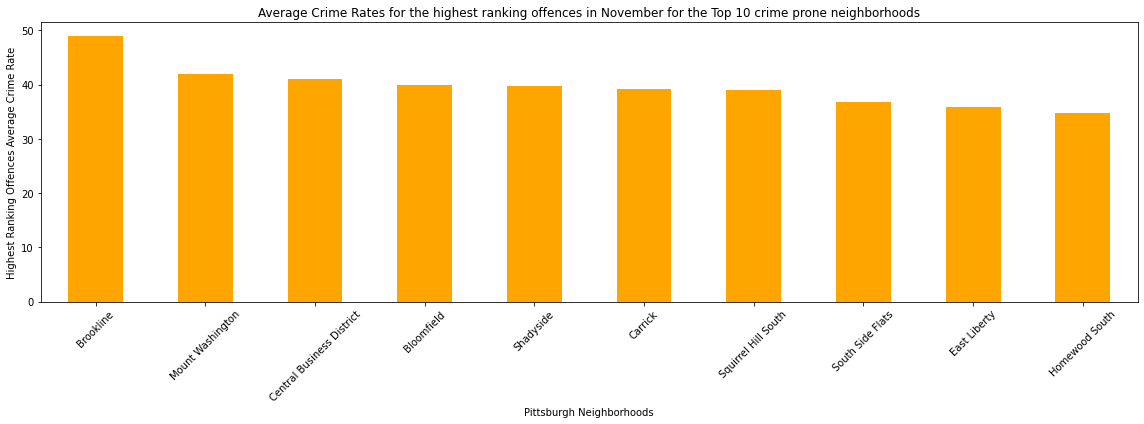

In [5]:
# Generates a 16 inches x 6 inches graph that shows the average crime rates for the most serious offences in the top 10 crime prone neighborhoods
plt.figure(figsize = (16, 6))
# Creates an orange colored bar graph that displays the average crime rates for the most serious offences in the top 10 crime prone neighborhoods
average_amount_of_crime_rates.plot(kind='bar', color = 'orange')
# Title of the bar graph
plt.title('Average Crime Rates for the highest ranking offences in November for the Top 10 crime prone neighborhoods')
# Label for describing the top 10 crime prone neighborhood names on the x- axis
plt.xlabel('Pittsburgh Neighborhoods')
# Label for describing the numbers on the y-axis
plt.ylabel('Highest Ranking Offences Average Crime Rate')
# Allows the names of the neighborhoods to be placed at 45 degree angle clockwise
plt.xticks(rotation = 45)
# Allows the title and the name of the neighborhoods on the x-axis to not overlap one another
plt.tight_layout()
# Displays the plot
plt.show()

### Dataset Explanation:
Our bar graph displays on average how many serious offenses have been committed in the top 10 crime-prone Pittsburgh Neighborhoods in November. On the "HIERARCHY COLUMN" of our dataset, we can see values assigned to certain offenses from the "OFFENSES" column of our dataset and these values are on a scale from 1 to 99, with 99 being the most severe. My code accounted for the higher end of the spectrum in the scale by obtaining data from neighborhoods that have offenses with a large hierarchy value.
### Result Explanation:
With a direct visual showing the total amount of crime incidents in all the neighborhoods of Pittsburgh, we can deduce what is the safest and least safe neighborhood to live in or accomplish one's goals in.
Individuals who want to live in a safe neighborhood would most likley prefer the top 5 least crime prone areas at the end of the bar graph whereas individuals who don't want to live in a neighborhood but rather set up a business in that neighborhood for example would probably choose a neighborhood with a moderate amount of crime incidents as there are neighborhoods where more consumers stay in but with some or several number of crime incidents also present in that neighborhood as they need customers
### Conclusion:
My favorite neighborhood in Pittsburgh is Central Oakland. In order to determine what is the best neighborhood in Pittsburgh based on safety, I calculated the number of crime incidents that have occured in Pittsburgh neighborhoods. In order to determine my personal favorite neighborhood, I would not look at the number of crime incidents that have occured in my favorite neighborhood but the various opportunities available for students to particpate in recreational and fun activities as well as events related to fun sports such as Tennis, basketball, etc.. Central Oakland offers various opportunities such as these to students like me.



# Final Analysis
Using all these dataset together we could set a formula for the danger rate
### The Fomula For Danger score 
Danger Score=Total Incident Frequency from Blotter Data+Total Firearm Seizures from Firearm Seizures Data

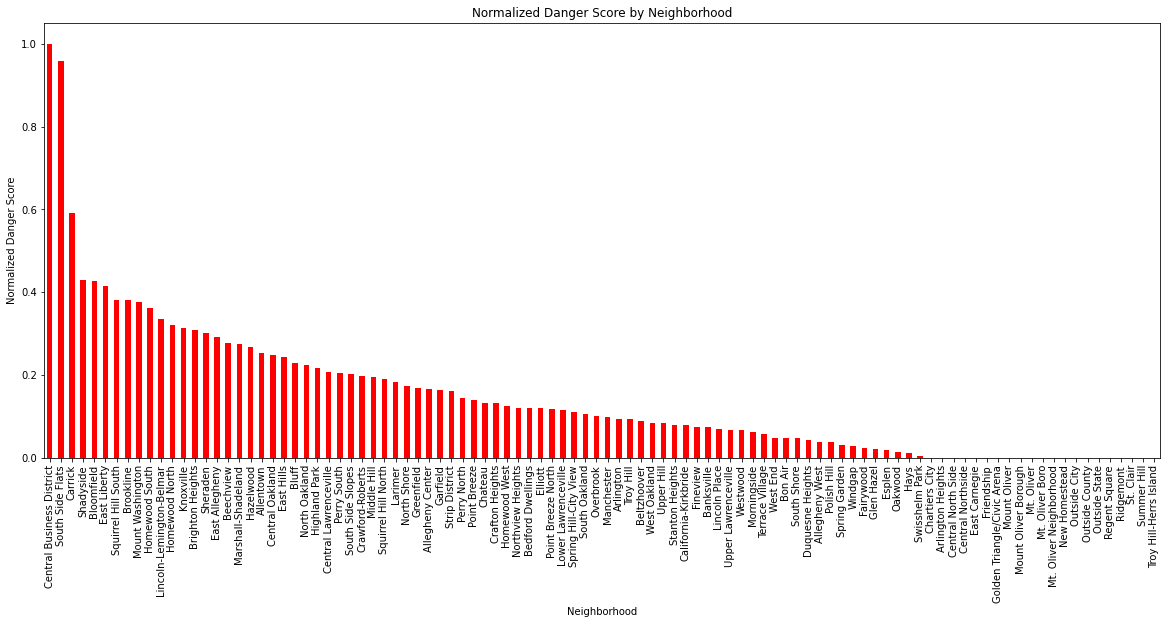

                Neighborhood  Danger Score
0  Central Business District      1.000000
1           South Side Flats      0.959444
2                    Carrick      0.592279
3                  Shadyside      0.429437
4                 Bloomfield      0.426767


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_blotter = 'Blotter Data.csv'
file_path_firearm = 'Firearm Seizures Data.csv'
file_path_arrest =  "https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e" # Add the path to the Police Arrest dataset

# Read the CSV files
df_blotter = pd.read_csv(file_path_blotter)
df_firearm = pd.read_csv(file_path_firearm)
df_arrest = pd.read_csv(file_path_arrest)  # Read the Police Arrest dataset

# Process Blotter Data
neighborhood_counts_blotter = df_blotter['INCIDENTNEIGHBORHOOD'].value_counts()

df_blotter['Hour'] = df_blotter['INCIDENTTIME'].apply(lambda x: int(x.split('T')[1].split(':')[0]))
grouped_data_blotter = df_blotter.groupby(['Hour', 'INCIDENTNEIGHBORHOOD']).size().unstack(fill_value=0)

# Calculate the total frequency for each neighborhood in Blotter Data
total_by_neighborhood_blotter = grouped_data_blotter.sum(axis=0)

# Process Firearm Seizures Data
filtered_data_firearm = df_firearm[df_firearm['year'].between(2020, 2023)]

# Calculate the total count for each neighborhood in Firearm Seizures Data
neighborhood_counts_firearm = filtered_data_firearm.groupby('neighborhood')['total_count'].sum()

# Process Police Arrest Data
neighborhood_counts_arrest = df_arrest['INCIDENTNEIGHBORHOOD'].value_counts()

# Combine information from all datasets and calculate a danger score
danger_score = (
    total_by_neighborhood_blotter +
    neighborhood_counts_firearm +
    neighborhood_counts_arrest
).sort_values(ascending=False)

# Normalize the danger score to be between 0 and 1
normalized_danger_score = (danger_score - danger_score.min()) / (danger_score.max() - danger_score.min())

# Create a DataFrame for the top 5 neighborhoods with danger scores
top5_neighborhoods_table = pd.DataFrame({'Neighborhood': normalized_danger_score.head(5).index, 'Danger Score': normalized_danger_score.head(5).values})

# Create a bar chart for the normalized danger score
plt.figure(figsize=(20, 8))
normalized_danger_score.plot(kind='bar', color='red')
plt.title('Normalized Danger Score by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Normalized Danger Score')
plt.show()

# Display the table
print(top5_neighborhoods_table)

# Conclusion

In conclusion, Troy Hill-Herrs Island would be the prime candidate for becoming the safest neighborhood in Pittsburgh if it was just based on the number of arrests. That being said, if I were to compare it to my favorite neighborhood of Southside, my favorite neighborhood would be known as a "bad neighborhood." However, when compared to each other, their activity levels are highly different due to the number of restaurants, stores, and businesses in Southside compared to Mt.Oliver. In my opinion, you can't base the best neighborhood on just how safe they are rather than on other factors.
